# Visualize, Evaluate and Compare Performance

## Table of Contents
- [1. Imports](#1-imports)
   - [1.1. Import Necessary Libraries](#11-import-necessary-libraries)
   - [1.2. Import Data](#12-import-data)
- [2. Visualizations](#2-visualizations)
   - [2.1. Average Best Fitness](21-average-best-fitness)
   - [2.2. Median Best Fitness](#22-median-best-fitness)
   - [2.3. Best Final Fitness](#23-best-final-fitness)

## 1. Imports

### 1.1. Import Necessary Libraries

__`Step 1`__ Import necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Import Data

__`Step 2`__ Import the data from our runs.

In [2]:
# Option 1:
df = pd.read_csv('data/Test.csv')

df.head()

,Configuration,Run,Generation,best_fitness
0,A,1,1,0.7009
1,A,1,2,0.4733
2,A,1,3,0.8143
3,A,1,4,0.3682
4,A,2,1,0.5415


## 2. Visualizations

### 2.1. Average Best Fitness

__`Step 3`__ Calculate the average best fitness of each generation of each configuration.

In [36]:
# Calculate the average best fitness for each genearation of each configuration
abf_by_config_gen = df.groupby(['Configuration', 'Generation'])['best_fitness'].mean().reset_index()

abf_by_config_gen.columns = ['Configuration', 'Generation', 'Average_Best_Fitness']

abf_by_config_gen

,Configuration,Generation,Average_Best_Fitness
0,A,1,0.723400
1,A,2,0.339200
2,A,3,0.684533
3,A,4,0.362533
4,B,1,0.642067
5,B,2,0.571533
6,B,3,0.354767
7,B,4,0.653467


__`Step 4`__ Plot the average best fitness of each generation of each configuration.

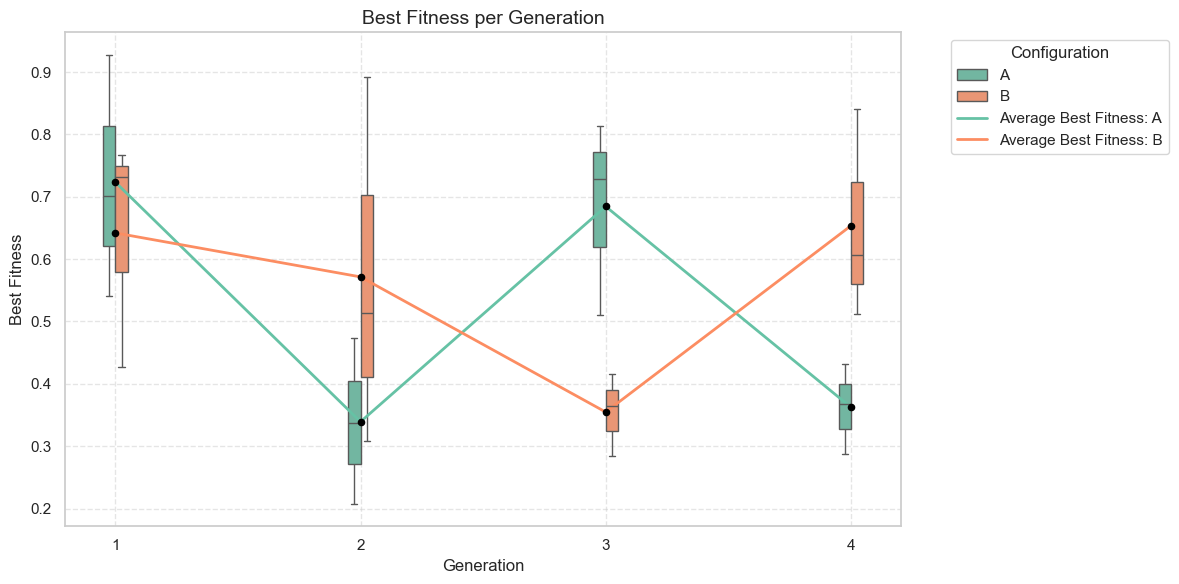

In [ ]:
# Get unique configurations
config_order = df['Configuration'].unique()
n_configs = len(config_order)

# Generate a palette with enough distinct colors
palette = sns.color_palette("Set2", n_configs)
color_map = dict(zip(config_order, palette))  # Map each config to a color

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Boxplot using the color map
sns.boxplot(
    x='Generation',
    y='best_fitness',
    hue='Configuration',
    data=df,
    width=0.1,
    fliersize=2,
    palette=color_map
)

# Plot average lines with matching colors
generation_order = sorted(df['Generation'].unique())

for config in config_order:
    config_med = abf_by_config_gen[abf_by_config_gen['Configuration'] == config]
    x_vals = [i for i in range(len(generation_order))]
    y_vals = config_med['Average_Best_Fitness'].values

    plt.plot(
        x_vals,
        y_vals,
        linestyle='-',
        linewidth=2,
        color=color_map[config],
        label=f'Average Best Fitness: {config}'
    )

    plt.scatter(
        x_vals,
        y_vals,
        color='black',        
        zorder=5,              
        s=20                  
    )

plt.title('Best Fitness per Generation', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best Fitness', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.show()

### 2.2. Median Best Fitness

__`Step 5`__ Calculate the median best fitness of each generation of each configuration.

In [57]:
# Calculate the median fitness for each genearation of each configuration
mbf_by_config_gen = df.groupby(['Configuration', 'Generation'])['best_fitness'].median().reset_index()

mbf_by_config_gen.columns = ['Configuration', 'Generation', 'Median_Best_Fitness']

mbf_by_config_gen

,Configuration,Generation,Median_Best_Fitness
0,A,1,0.7009
1,A,2,0.3367
2,A,3,0.7286
3,A,4,0.3682
4,B,1,0.7314
5,B,2,0.5137
6,B,3,0.3648
7,B,4,0.6065


__`Step 6`__ Plot the median best fitness of each generation of each configuration.

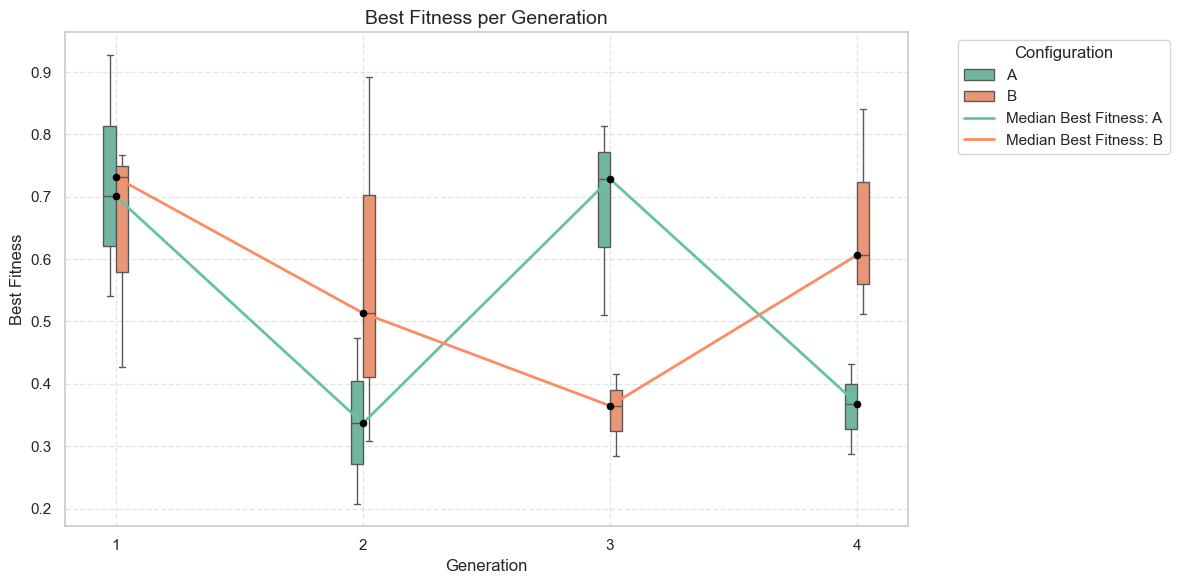

In [ ]:
config_order = df['Configuration'].unique()
n_configs = len(config_order)

# Generate a palette with enough distinct colors
palette = sns.color_palette("Set2", n_configs)
color_map = dict(zip(config_order, palette))  # Map each config to a color

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(
    x='Generation',
    y='best_fitness',
    hue='Configuration',
    data=df,
    width=0.1,
    fliersize=2,
    palette=color_map
)

# Plot median lines with matching colors
generation_order = sorted(df['Generation'].unique())

for config in config_order:
    config_med = mbf_by_config_gen[mbf_by_config_gen['Configuration'] == config]
    x_vals = [i for i in range(len(generation_order))]
    y_vals = config_med['Median_Best_Fitness'].values

    plt.plot(
        x_vals,
        y_vals,
        linestyle='-',
        linewidth=2,
        color=color_map[config],  
        label=f'Median Best Fitness: {config}'
    )

    plt.scatter(
        x_vals,
        y_vals,
        color='black',        
        zorder=5,              
        s=20                  
    )

plt.title('Best Fitness per Generation', fontsize=14)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best Fitness', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2.3. Best Final Fitness

In [ ]:
#WIP